# Example Evaluation Code

This notebook will be very __similar__ to the code I use to evaluate your results - it is provided for __your convenience__ so that you can use it to evaluate your preprocessing results at any time before your __final submission__.

Please note that the results here will __NOT__ be the same as my evaluation results.

Let's start with loading the required packages.

In [164]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

Next you should load __your__ data. In this case, I am using a sample dataset (`GroupX.csv`) which contains 6 predictors (`X1 - X6`) and two target variables (`Y1, Y2`).

Please make sure you change the data to your __OWN__ dataset when using this code.

__NOTE__:
1. Your dataset maybe very different from the sample dataset.
2. Please follow this structure when submitting your dataset.

In [166]:
#check_this_mean average 10 run y1 61, 65
#check_this_mean_z average 10 run y1 60, average 10 run y2 67
data = pd.read_csv('check_this_mean.csv', header=0)
data.head()

,Unnamed: 0,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,...,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
0,0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10.0,9.5,8.5,11.870000,122.00,1.0,0.60,...,470.0,12719.0,11560.0,301.0,690.0,62.0,10.816654,139.0,0,1
1,1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8.0,10.0,8.0,7.250000,152.75,0.0,-1.62,...,791.0,21792.0,19585.0,510.0,1120.0,71.0,15.556349,237.0,1,0
2,2,ACAD,ACADIA PHARMACEUTICALS INC,7.0,14.0,12.0,6.700000,90.00,1.0,-1.24,...,201.0,5262.0,4785.0,128.0,325.0,61.0,5.744563,60.0,1,0
3,3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16.0,14.0,12.390000,209.00,1.0,-0.91,...,328.0,8259.0,7574.0,177.0,509.0,80.0,7.681146,110.0,1,1
4,4,ACLI,AMERICAN COMMERCIAL LINES INC.,21.0,21.0,19.0,21.030001,80.00,1.0,0.07,...,572.0,14830.0,13176.0,336.0,720.0,67.0,12.206556,167.0,0,1


Checking your data types and make sure it follows the data dictionary would be an important step, you can do that using the `.dtypes` attribute.

__NOTE__: all __continuous__ faetures will be in `float64` data type, and all __categorical__ features will be in `int64` data type (given you already coded (per __suggest task \#6__ in the competition document) them).

In [167]:
data.dtypes

Unnamed: 0                      int64
ticker                         object
company_name                   object
offer_price                   float64
price_range_higher_bound      float64
price_range_lower_bound       float64
first_day_trading_price       float64
days                          float64
top_tier_dummy                float64
positive_eps_dummy            float64
prior_nasdaq_15day_returns    float64
share_overhang                float64
up_revision                   float64
sales                         float64
number_of_sentences           float64
number_of_words               float64
number_of_real_words          float64
number_of_long_sentences      float64
number_of_long_words          float64
number_of_positive_words      float64
number_of_negative_words      float64
number_of_uncertain_words     float64
pre_IPO_price_revision          int64
post_IPO_initial_return         int64
dtype: object

Now you need to specify your targets and predictors. __NOTE__ we have two targets here (`Y1, Y2`).

In [168]:
y1 = data.pre_IPO_price_revision
y2 = data.post_IPO_initial_return

Check the shape of the data.

In [169]:
data.shape

(682, 24)

It is very possible that you will use different sets of the predictors for `Y1` and `Y2`. Now let's define them.

First, let's define predictors for `Y1` - which will be the first 5 features in `data`.

In [170]:
cols = list(data.columns)
# first 5 features 
cols[:-3]

['Unnamed: 0',
 'ticker',
 'company_name',
 'offer_price',
 'price_range_higher_bound',
 'price_range_lower_bound',
 'first_day_trading_price',
 'days',
 'top_tier_dummy',
 'positive_eps_dummy',
 'prior_nasdaq_15day_returns',
 'share_overhang',
 'up_revision',
 'sales',
 'number_of_sentences',
 'number_of_words',
 'number_of_real_words',
 'number_of_long_sentences',
 'number_of_long_words',
 'number_of_positive_words',
 'number_of_negative_words']

Use below code to select the first 5 features as predictors for `Y1`.

In [171]:
predictors_y1 = data[cols[:-3]].drop(['Unnamed: 0','ticker','company_name','price_range_higher_bound','price_range_lower_bound','offer_price','first_day_trading_price','top_tier_dummy'],1)
predictors_y1.head()

,days,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words
0,122.00,0.60,0.029074,344.715307,3255.764119,3.716773,470.0,12719.0,11560.0,301.0,690.0,62.0,10.816654
1,152.75,-1.62,-0.013352,306.769065,1549.193338,2.960063,791.0,21792.0,19585.0,510.0,1120.0,71.0,15.556349
2,90.00,-1.24,0.020715,256.347692,2236.067977,1.946762,201.0,5262.0,4785.0,128.0,325.0,61.0,5.744563
3,209.00,-0.91,0.020023,245.788861,2121.320344,2.042906,328.0,8259.0,7574.0,177.0,509.0,80.0,7.681146
4,80.00,0.07,-0.034895,313.263192,2872.281323,8.583029,572.0,14830.0,13176.0,336.0,720.0,67.0,12.206556


Upon investigation of the data, we know we have __six__ features (`X1 - X6`) predicting `Y2`. Use similar code (as below) to select them.

In [172]:
predictors_y2 = data[cols[:-2]].drop(['Unnamed: 0','ticker','company_name','price_range_higher_bound','price_range_lower_bound','first_day_trading_price','offer_price','top_tier_dummy'],1)
predictors_y2.head()

,days,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words
0,122.00,0.60,0.029074,344.715307,3255.764119,3.716773,470.0,12719.0,11560.0,301.0,690.0,62.0,10.816654,139.0
1,152.75,-1.62,-0.013352,306.769065,1549.193338,2.960063,791.0,21792.0,19585.0,510.0,1120.0,71.0,15.556349,237.0
2,90.00,-1.24,0.020715,256.347692,2236.067977,1.946762,201.0,5262.0,4785.0,128.0,325.0,61.0,5.744563,60.0
3,209.00,-0.91,0.020023,245.788861,2121.320344,2.042906,328.0,8259.0,7574.0,177.0,509.0,80.0,7.681146,110.0
4,80.00,0.07,-0.034895,313.263192,2872.281323,8.583029,572.0,14830.0,13176.0,336.0,720.0,67.0,12.206556,167.0


Below is the key part of this notebook - which generates a `logistic regression` model to predict `Y1`/`Y2`.

The code works this way:

1. We generate two lists `f1_score_lst` and `auc_lst` to store f1_score and AUC from each of the `10` runs of the model;
2. Define model:
    1. We define a `LogisticRegression()` model;
    
    2. We split predictors (`predictors_y1`) and target `y1` to training (80%) and testing (20%);
    
    3. We fit the model `clf` to the training data, then use it to predict on the testing data;
    
    4. We also defined a `10-fold cross validation` to make sure our model do not overfit - see [here](https://scikit-learn.org/stable/modules/cross_validation.html) for more info;
    
    5. We append the f1_score and AUC of current model to the lists (`f1_score_lst` and `auc_lst`) we defined earlier.
  
3. Print out average f1_score and AUC for all 10 runs;
4. Print out average average accuracy from cross validation
5. Print out confusion matrix and classification report for the __last__ model.

__NOTE__: Step 3 provides the evaluation results we need; step 4 - 5 can be used to verify the results from step 3.

In [173]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    #Model building
    clf = LogisticRegression()
    X1_train, X1_test, y1_train, y1_test = train_test_split(predictors_y1, y1, test_size=0.2, random_state=123)
    clf.fit(X1_train, y1_train)

    y1_pred = clf.predict(X1_test)

    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf, X1_train, y1_train, cv=kfold, scoring=scoring)

    

    
    #calculate f1-score and AUC
    
    clf_roc_auc = roc_auc_score(y1_test, y1_pred)
    f1_score_lst.append(precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y1 = confusion_matrix(y1_test, y1_pred)


#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X1_test, y1_test)))

print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))

print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y1)

print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y1_test, y1_pred))


F1 0.5623; AUC 0.5624 
Accuracy of classifier on test set: 0.56
10-fold cross validation average accuracy of classifier: 0.565
Confusion Matrix for Logistic Regression Classfier:
[[37 28]
 [32 40]]
Classification Report for Logistic Regression Classfier:
             precision    recall  f1-score   support

          0       0.54      0.57      0.55        65
          1       0.59      0.56      0.57        72

avg / total       0.56      0.56      0.56       137



Below code are used to evaluate model toward `Y2`. It is very similar to the code above - key difference is that `Y2` is imbalanced - so I wrote some code (under `# Begin oversampling`) to deal with that.

In [174]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    #Model building
    clf1 = LogisticRegression()
    
    # Splitting data into testing and training
    X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=123)
    
    # Begin oversampling
    oversample = pd.concat([X2_train,y2_train],axis=1)
    max_size = oversample['post_IPO_initial_return'].value_counts().max()
    lst = [oversample]
    for class_index, group in oversample.groupby('post_IPO_initial_return'):
        lst.append(group.sample(max_size-len(group), replace=True))
    X2_train = pd.concat(lst)
    y2_train=pd.DataFrame.copy(X2_train['post_IPO_initial_return'])
    del X2_train['post_IPO_initial_return']
    # fitting model on oversampled data
    clf1.fit(X2_train, y2_train)
    
    y2_pred = clf1.predict(X2_test)
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf1, X2_train, y2_train, cv=kfold, scoring=scoring)
    
    #calculate f1-score and AUC
    clf1_roc_auc = roc_auc_score(y2_test, y2_pred)
    
    
    #calculate average f1-score and AUC
    f1_score_lst.append(precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2])
    auc_lst.append(clf1_roc_auc)
    
    
print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

confusion_matrix_y2 = confusion_matrix(y2_test, y2_pred)


print('Accuracy of classifier on test set: {:.3f}'.format(clf1.score(X2_test, y2_test)))

print("10-fold cross validation average accuracy of clf1: %.3f" % (results.mean()))

print('Confusion Matrix for Classfier:')
print(confusion_matrix_y2)

print('Classification Report for Classfier:')
print(classification_report(y2_test, y2_pred))


F1 0.5445; AUC 0.5078 
Accuracy of classifier on test set: 0.555
10-fold cross validation average accuracy of clf1: 0.453
Confusion Matrix for Classfier:
[[22 20]
 [41 54]]
Classification Report for Classfier:
             precision    recall  f1-score   support

          0       0.35      0.52      0.42        42
          1       0.73      0.57      0.64        95

avg / total       0.61      0.55      0.57       137



In [178]:
from xgboost import XGBClassifier
scores1 = []
scores2 = []
count=0
for i in range(0,100):
    X1_train, X1_test, y1_train, y1_test = train_test_split(predictors_y1, y1, test_size=0.2, random_state=i)
    X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=i)
    model1 = XGBClassifier(learning_rate = 0.1,
                      n_estimators=1000,
                      max_depth=10,
                      min_child_weight=1,
                      gamma=0.5,
                      reg_alpha=0.05,
                      colsample_bytree=0.8,
                      objective='binary:logistic',
                      scal_pos_weight=1,
                      seed=27)
    model2 = XGBClassifier(learning_rate = 0.1,
                      n_estimators=1000,
                      max_depth=10,
                      min_child_weight=1,
                      gamma=0,
                      reg_alpha=0,
                      colsample_bytree=1.0,
                      objective='binary:logistic',
                      scal_pos_weight=1,
                      seed=27)

    model1.fit(X1_train,y1_train)
    model2.fit(X2_train,y2_train)
    
    y_pred1 = model1.predict(X1_test)
    y_pred2 = model2.predict(X2_test)
    
    accuracy1 = accuracy_score(y1_test, y_pred1)
    accuracy2 = accuracy_score(y2_test, y_pred2)
    scores1.append(accuracy1)
    scores2.append(accuracy2)
    print(count)
    count = count + 1

import numpy as np
print('Accuracy y1: is {}'.format(np.mean(scores1)))
print('Accuracy y2: is {}'.format(np.mean(scores2)))

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy y1: is 0.6054014598540146
Accuracy y2: is 0.661021897810219


C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [177]:
X1_train, X1_test, y1_train, y1_test = train_test_split(predictors_y1, y1, test_size=0.2, random_state=124)
X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=124)

In [155]:
scores1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scal_pos_weight=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=1)

In [156]:
y_pred1 = model1.predict(X1_test)
y_pred2 = model2.predict(X2_test)

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [157]:
accuracy1 = accuracy_score(y1_test, y_pred1)
accuracy2 = accuracy_score(y2_test, y_pred2)
print('Accuracy y1: is {}'.format(accuracy1))
print('Accuracy y2: is {}'.format(accuracy2))

Accuracy y1: is 0.5985401459854015
Accuracy y2: is 0.6642335766423357


In [137]:
from sklearn.grid_search import GridSearchCV
#param_test1 = {
#               'max_depth':[3,7,10],
#               'min_child_weight':[1,3,6],
#               'gamma':[0,0.5,1.0],
#               'colsample_bytree':[0,0.5,1.0],
#               'reg_alpha':[0,0.005,0.01,0.05]
#              }
param_test1 = {'max_depth':[10],'min_child_weight':[1],'reg_alpha':[0.05],'gamma':[0.5],'colsample_bytree':[1]}
gsearch1 = GridSearchCV(estimator = model1,param_grid = param_test1,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch1.fit(X1_train,y1_train)
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_

([mean: 0.97518, std: 0.00758, params: {'colsample_bytree': 1, 'gamma': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'reg_alpha': 0.05}],
 {'colsample_bytree': 1,
  'gamma': 0.5,
  'max_depth': 10,
  'min_child_weight': 1,
  'reg_alpha': 0.05},
 0.9751791726791726)

In [138]:
from sklearn.grid_search import GridSearchCV
#param_test2 = {
#               'max_depth':[3,7,10],
#               'min_child_weight':[1,3,6],
#               'gamma':[0,0.5,1.0],
#               'colsample_bytree':[0,0.5,1.0],
#               'reg_alpha':[0,0.005,0.01,0.05]
#              }
param_test2= {'max_depth':[10], 'min_child_weight':[1],'reg_alpha':[.2],'gamma':[0],'colsample_bytree':[1]}
gsearch2 = GridSearchCV(estimator = model2,param_grid = param_test2,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch2.fit(X2_train,y2_train)
gsearch2.grid_scores_,gsearch2.best_params_,gsearch2.best_score_

([mean: 0.95388, std: 0.05499, params: {'colsample_bytree': 1, 'gamma': 0, 'max_depth': 10, 'min_child_weight': 1, 'reg_alpha': 0.2}],
 {'colsample_bytree': 1,
  'gamma': 0,
  'max_depth': 10,
  'min_child_weight': 1,
  'reg_alpha': 0.2},
 0.9538773081730124)

model 1 best_performance: colsample_bytree:1.0,gamma:0.5,max_depth=10,min_child_weight=1,reg_alpha=0.05
model 2 best_performance: colsample_bytree:1.0,gamma:0,max_depth=10,min_child_weight=1,reg_alpha=0


(<matplotlib.axes._subplots.AxesSubplot at 0x25d8b36c588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25d8c3cb518>)

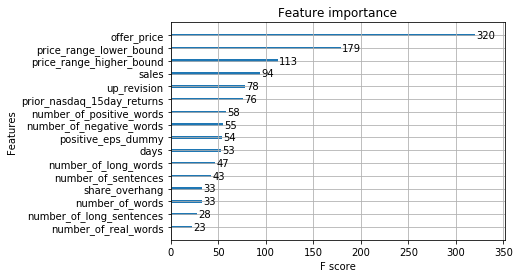

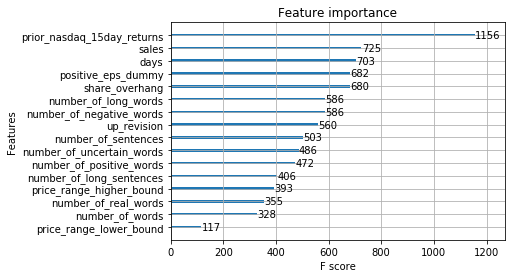

In [139]:
print('model 1 best_performance: colsample_bytree:1.0,gamma:0.5,max_depth=10,min_child_weight=1,reg_alpha=0.05')
print('model 2 best_performance: colsample_bytree:1.0,gamma:0,max_depth=10,min_child_weight=1,reg_alpha=0')

from xgboost import plot_importance
plot_importance(model1), plot_importance(model2)

In [ ]:
#let's bin top 5
#prior_nasdaq_15day_returns
#up_revision
#offer_price
#days
#number_of_negative_worsd

In [ ]:
model1 = 